In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.layers import Dense,Activation,Conv2D,Dropout,MaxPooling2D,Flatten
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.models import Sequential,load_model
from keras.optimizers import Adam

In [0]:
import h5py
import numpy as np

# Open the file as readonly. The file should be present inside a directory called "data" in the same folder as code
h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test_orig = h5f['X_test'][:]
y_test_orig = h5f['y_test'][:]


# Close this file
h5f.close()


In [29]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [30]:
x_train.shape,y_train.shape,x_test_orig.shape,y_test_orig.shape

((42000, 32, 32), (42000,), (18000, 32, 32), (18000,))

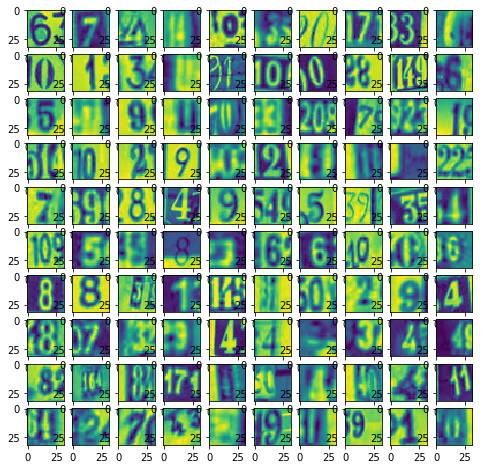

In [31]:
# display images

r=10
c=10
fig=plt.figure(figsize=(8, 8))
for i in range(1,101):
  fig.add_subplot(r, c, i)
  plt.imshow(x_train[i])
plt.show()

In [0]:
x_train=x_train/255
x_test=x_test_orig/255

In [0]:
x_train=x_train.reshape(-1,32,32,1)
x_test=x_test_orig.reshape(-1,32,32,1)

In [34]:
x_train.shape,y_train.shape,x_test.shape,y_test_orig.shape

((42000, 32, 32, 1), (42000,), (18000, 32, 32, 1), (18000,))

In [0]:
# one hot encoding
y_train=to_categorical(y_train)
y_test=to_categorical(y_test_orig)

In [36]:
np.unique(y_train)

array([0., 1.], dtype=float32)

In [0]:
# Knn 
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier(n_neighbors=5)
k.fit(x_train.reshape(42000,-1),y_train.reshape(42000,-1))
Y_pred=k.predict(x_test.reshape(18000,-1))

In [42]:
from sklearn.metrics import classification_report,accuracy_score
report =classification_report(y_test,Y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1814
           1       0.00      0.00      0.00      1828
           2       0.00      0.00      0.00      1803
           3       0.00      0.00      0.00      1719
           4       0.00      0.00      0.00      1812
           5       0.09      0.04      0.06      1768
           6       0.00      0.00      0.00      1832
           7       0.33      0.00      0.00      1808
           8       0.00      0.00      0.00      1812
           9       0.00      0.00      0.00      1804

   micro avg       0.09      0.00      0.01     18000
   macro avg       0.04      0.00      0.01     18000
weighted avg       0.04      0.00      0.01     18000
 samples avg       0.00      0.00      0.00     18000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [0]:
# Not getting minimum accuracy with knn


In [0]:
# budilding basic cnn
model= Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,1)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25,name='drop_1'))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25,name='drop_2'))


model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))
model.compile('Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_141 (Conv2D)          (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 30, 30, 64)        18496     
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
drop_1 (Dropout)             (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 12, 12, 32)        36896     
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 10, 10, 64)        18496     
__________

In [0]:
callbacks=ModelCheckpoint(filepath='./model.h5',monitor='val_acc',save_best_only=True)


In [0]:
h=model.fit(x_train,y_train,batch_size=98,epochs=20,validation_data=(x_test,y_test),callbacks=[callbacks])

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 14s 323us/step - loss: 1.1537 - acc: 0.6129 - val_loss: 0.5444 - val_acc: 0.8358
Epoch 2/20
42000/42000 [==============================] - 11s 254us/step - loss: 0.5043 - acc: 0.8473 - val_loss: 0.3845 - val_acc: 0.8846
Epoch 3/20
42000/42000 [==============================] - 11s 253us/step - loss: 0.3817 - acc: 0.8853 - val_loss: 0.3484 - val_acc: 0.8971
Epoch 4/20
42000/42000 [==============================] - 11s 254us/step - loss: 0.3226 - acc: 0.9022 - val_loss: 0.3244 - val_acc: 0.9059
Epoch 5/20
42000/42000 [==============================] - 11s 253us/step - loss: 0.2798 - acc: 0.9174 - val_loss: 0.3208 - val_acc: 0.9041
Epoch 6/20
42000/42000 [==============================] - 11s 252us/step - loss: 0.2543 - acc: 0.9235 - val_loss: 0.2764 - val_acc: 0.9193
Epoch 7/20
42000/42000 [==============================] - 11s 252us/step - loss: 0.2314 - acc: 0.9297 - val_loss: 0.

W0724 07:58:03.222000 139816387549056 legend.py:1289] No handles with labels found to put in legend.


[]

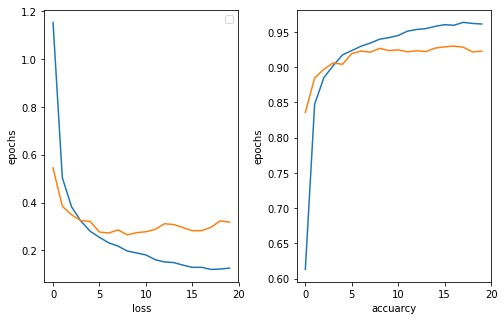

In [0]:
#ploting losss and value loss

fig=plt.figure(figsize=(8,5))
fig.add_subplot(1,2,1)
plt.xlabel('loss')
plt.legend(loc='best')
plt.ylabel('epochs')
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

fig.add_subplot(1,2,2)

plt.xlabel('accuarcy')
plt.ylabel('epochs')
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.subplots_adjust(wspace=0.30)
plt.plot()


# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.plot(h.history['loss'])
# plt.plot(h.history['val_loss'])
# plt.plot()

In [0]:
model=load_model('./model.h5')
Y_pred=model.predict_classes(x_test)

In [0]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_orig,Y_pred)

0.9298888888888889

[]

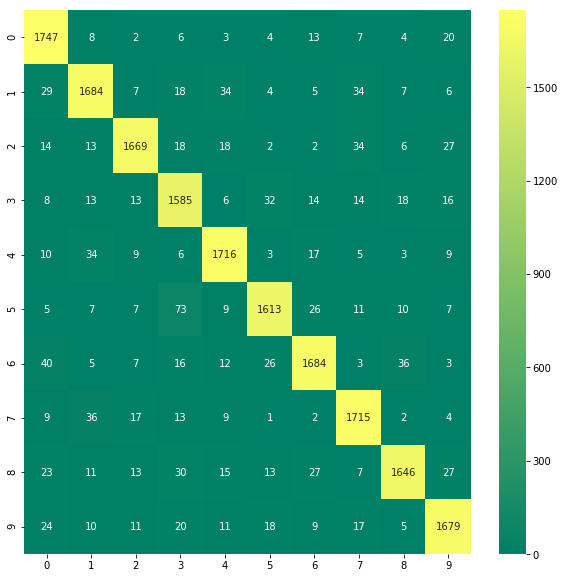

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test_orig,Y_pred),cmap='summer',annot=True,fmt='g')
plt.plot()
